In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv(r"FuelConsumptionCo2.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [4]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [5]:
df['CO2EMISSIONS'].dtypes

dtype('int64')

In [6]:
#Checking correlation
df["MODELYEAR"].corr(df["CO2EMISSIONS"])

nan

In [7]:
df["ENGINESIZE"].corr(df["CO2EMISSIONS"])

0.8741543683958121

In [8]:
df["CYLINDERS"].corr(df["CO2EMISSIONS"])

0.8496845920141155

In [9]:
df["FUELCONSUMPTION_COMB"].corr(df["CO2EMISSIONS"])

0.8921285933157568

In [10]:
#plot
import matplotlib.pyplot as plt

<AxesSubplot:>

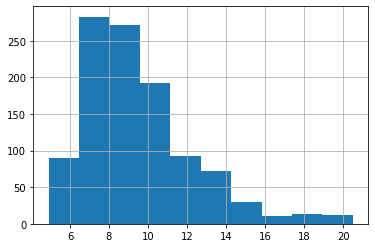

In [11]:
df["FUELCONSUMPTION_HWY"].hist()

Text(0.5, 1.0, 'Relation between fuel consumption and co2 emissions')

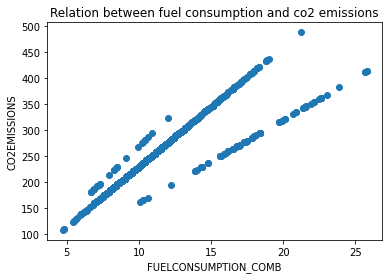

In [12]:
# plotting relation for df["FUELCONSUMPTION_COMB"].corr(df["CO2EMISSIONS"])
plt.scatter(df["FUELCONSUMPTION_COMB"],df["CO2EMISSIONS"])
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("CO2EMISSIONS")
plt.title("Relation between fuel consumption and co2 emissions")

Text(0.5, 1.0, 'Relation between fuel consumption and co2 emissions')

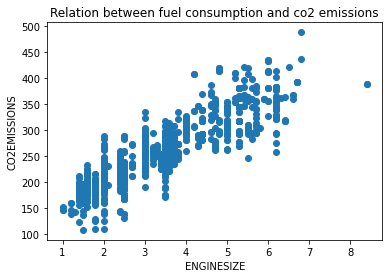

In [13]:
#enginesize vs #co2emissions
plt.scatter(df["ENGINESIZE"],df["CO2EMISSIONS"])
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSIONS")
plt.title("Relation between fuel consumption and co2 emissions")

<AxesSubplot:xlabel='ENGINESIZE', ylabel='CO2EMISSIONS'>

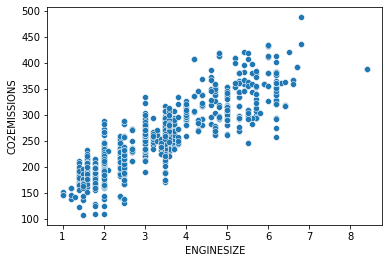

In [14]:
#Using seaborn
import seaborn as sns
sns.scatterplot(x=df.ENGINESIZE,y=df.CO2EMISSIONS)

In [15]:
df2=df[["ENGINESIZE","CYLINDERS","FUELCONSUMPTION_HWY","FUELCONSUMPTION_COMB","CO2EMISSIONS"]]

In [16]:
df2.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,6.7,8.5,196
1,2.4,4,7.7,9.6,221
2,1.5,4,5.8,5.9,136
3,3.5,6,9.1,11.1,255
4,3.5,6,8.7,10.6,244


In [17]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ENGINESIZE            1067 non-null   float64
 1   CYLINDERS             1067 non-null   int64  
 2   FUELCONSUMPTION_HWY   1067 non-null   float64
 3   FUELCONSUMPTION_COMB  1067 non-null   float64
 4   CO2EMISSIONS          1067 non-null   int64  
dtypes: float64(3), int64(2)
memory usage: 41.8 KB


array([[<AxesSubplot:title={'center':'ENGINESIZE'}>,
        <AxesSubplot:title={'center':'CYLINDERS'}>],
       [<AxesSubplot:title={'center':'FUELCONSUMPTION_HWY'}>,
        <AxesSubplot:title={'center':'FUELCONSUMPTION_COMB'}>],
       [<AxesSubplot:title={'center':'CO2EMISSIONS'}>, <AxesSubplot:>]],
      dtype=object)

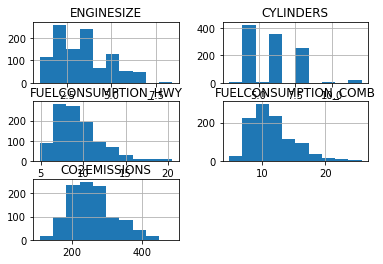

In [18]:
df2.hist()

In [19]:
#Split into training and testing data

In [20]:
msk=np.random.rand(len(df2))<0.8
#randomizes the data and stores 80% of the entire data frame

In [21]:
train_df=df2[msk]
test_df=df2[~msk]

In [22]:
train_df

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,6.7,8.5,196
1,2.4,4,7.7,9.6,221
3,3.5,6,9.1,11.1,255
4,3.5,6,8.7,10.6,244
5,3.5,6,7.7,10.0,230
...,...,...,...,...,...
1061,3.2,6,8.9,11.2,258
1062,3.0,6,9.8,11.8,271
1063,3.2,6,9.5,11.5,264
1064,3.0,6,9.8,11.8,271


In [23]:
test_df.shape

(213, 5)

In [24]:
#Converting training and testing data to numpy array

#Starting with only one col- S I M P L E   R E G R E S S I O N
x_train_df= train_df[["ENGINESIZE"]]
y_train_df= train_df[["CO2EMISSIONS"]]
x_test_df= test_df[["ENGINESIZE"]]
y_test_df= test_df[["CO2EMISSIONS"]]
#Converting to numpy array
x_train_df= np.asarray(x_train_df)
y_train_df= np.asarray(y_train_df)
x_test_df= np.asarray(x_test_df)
y_test_df= np.asarray(y_test_df)

In [25]:
x_train_df

array([[2. ],
       [2.4],
       [3.5],
       [3.5],
       [3.5],
       [3.7],
       [3.7],
       [2.4],
       [3.5],
       [5.9],
       [4.7],
       [4.7],
       [4.7],
       [5.9],
       [2. ],
       [2. ],
       [2. ],
       [3. ],
       [3. ],
       [3. ],
       [4. ],
       [3. ],
       [4. ],
       [6.3],
       [3. ],
       [2. ],
       [3. ],
       [2. ],
       [3. ],
       [3. ],
       [3. ],
       [5.2],
       [5.2],
       [4.2],
       [4.2],
       [5.2],
       [5.2],
       [4.2],
       [4.2],
       [4. ],
       [3. ],
       [3. ],
       [3. ],
       [3. ],
       [3. ],
       [3. ],
       [2. ],
       [2. ],
       [2. ],
       [4. ],
       [6. ],
       [4. ],
       [6. ],
       [4. ],
       [6. ],
       [6.8],
       [2. ],
       [2. ],
       [2. ],
       [2. ],
       [2. ],
       [2. ],
       [2. ],
       [2. ],
       [2. ],
       [2. ],
       [3. ],
       [3. ],
       [3. ],
       [3. ],
       [2. ],
      

In [26]:
# Create a model
from sklearn import linear_model
clf=linear_model.LinearRegression()

In [27]:
#Train
clf.fit(x_train_df,y_train_df)

LinearRegression()

In [28]:
c=clf.intercept_
c

array([124.78299377])

In [29]:
m=clf.coef_
m

array([[39.49931589]])

In [30]:
# y= mx + c
#Co2 Emissions =  38.91 * Engine size + 126.06

In [31]:
#Actual Values
x_test_df[0:4]

array([[1.5],
       [3.5],
       [2.4],
       [5.9]])

In [32]:
y_test_df[0:4]

array([[136],
       [232],
       [225],
       [359]], dtype=int64)

In [33]:
# Testing

In [34]:
clf.predict(x_test_df[0:4])

array([[184.0319676 ],
       [263.03059937],
       [219.58135189],
       [357.8289575 ]])

In [35]:
#Predicted values
y_predicted = clf.predict(x_test_df)

In [36]:
# Mean Absolute Error
np.mean(np.abs(y_predicted - y_test_df))

20.899064494730062

In [37]:
from sklearn import linear_model

In [38]:
#Converting training and testing data to numpy array

#Using multiple cols- M U L T I P L E   R E G R E S S I O N
x_train_df= train_df[["ENGINESIZE","CYLINDERS","FUELCONSUMPTION_HWY","FUELCONSUMPTION_COMB"]]
y_train_df= train_df[["CO2EMISSIONS"]]
x_test_df= test_df[["ENGINESIZE","CYLINDERS","FUELCONSUMPTION_HWY","FUELCONSUMPTION_COMB"]]
y_test_df= test_df[["CO2EMISSIONS"]]
#Converting to numpy array
x_train_df= np.asarray(x_train_df)
y_train_df= np.asarray(y_train_df)
x_test_df= np.asarray(x_test_df)
y_test_df= np.asarray(y_test_df)

In [39]:
# Create a model
clf=linear_model.LinearRegression()
#Train
clf.fit(x_train_df,y_train_df)

LinearRegression()

In [40]:
print(clf.intercept_)
print(clf.coef_)

[65.04538459]
[[10.93280689  7.85982066  0.1015565   9.34627022]]


In [41]:
#Prediction
y_predicted = clf.predict(x_test_df)

In [42]:
y_predicted[0:4]

array([[168.61589959],
       [245.68906958],
       [215.13945961],
       [370.94822056]])

In [43]:
#Actual values
y_test_df[0:4]

array([[136],
       [232],
       [225],
       [359]], dtype=int64)

In [49]:
#Calculating r2 score of the predicted data
from sklearn.metrics import r2_score
r2_score(y_test_df,y_predicted)

0.8877355313035324